# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-03 23:57:45.325828: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


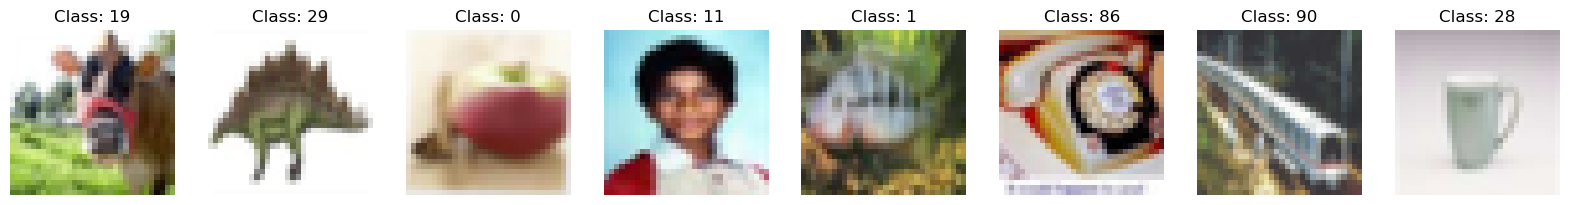

In [2]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Print the shape of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Print the image dimensions
print(f"Image dimensions: {X_train.shape[1:]}")

# Determine the number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Display 8 examples from the training set
fig, axes = plt.subplots(1, 8, figsize=(20, 3))
for i in range(8):
    axes[i].imshow(X_train[i])  # X_train contains the images
    axes[i].set_title(f"Class: {y_train[i][0]}")  # y_train contains the labels
    axes[i].axis('off')  # Turn off axis

plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the data
X_train_normalized = np.divide(X_train.astype(np.float32), 255)
X_test_normalized = np.divide(X_test.astype(np.float32), 255)

# One-hot encode the labels
num_classes = 100
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_normalized, y_train_one_hot, test_size=0.2, random_state=42
)

# Print shapes of the datasets
data_shapes = {
    "Training data shape": X_train_split.shape,
    "Validation data shape": X_val_split.shape,
    "Test data shape": X_test_normalized.shape,
    "Training labels shape": y_train_split.shape,
    "Validation labels shape": y_val_split.shape,
    "Test labels shape": y_test_one_hot.shape
}

for description, shape in data_shapes.items():
    print(f"{description}: {shape}")


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

2024-08-03 23:57:55.373767: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b>  Since the data is one-hot encoded, I applied Categorical cross-entropy, which will effectively measure the accuracy of predicting the probability that a sample belongs to one of the 100 classes.
- <b>Optimizer:</b> Adam is the most popular algorithm frequently used for image classification tasks. 

In [5]:
from keras import optimizers
from tensorflow.keras.metrics import Precision, Recall
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy', Precision(), Recall()]
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
# Your code here
# Train the model
train_data = (X_train_split, y_train_split)
val_data = (X_val_split, y_val_split)
batch_size = 32
epochs = 18

history = model.fit(
    train_data[0], 
    train_data[1],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=val_data,
    shuffle=True
)

Epoch 1/18
1250/1250 [==============================] - 156s 123ms/step - loss: 3.5785 - accuracy: 0.1645 - precision: 0.6266 - recall: 0.0321 - val_loss: 3.0861 - val_accuracy: 0.2504 - val_precision: 0.6519 - val_recall: 0.0753
Epoch 2/18
1250/1250 [==============================] - 141s 113ms/step - loss: 2.7617 - accuracy: 0.3117 - precision: 0.6965 - recall: 0.1213 - val_loss: 2.6959 - val_accuracy: 0.3362 - val_precision: 0.6862 - val_recall: 0.1524
Epoch 3/18
1250/1250 [==============================] - 95s 76ms/step - loss: 2.3229 - accuracy: 0.3977 - precision: 0.7340 - recall: 0.2044 - val_loss: 2.5652 - val_accuracy: 0.3601 - val_precision: 0.6799 - val_recall: 0.1907
Epoch 4/18
1250/1250 [==============================] - 104s 83ms/step - loss: 1.9435 - accuracy: 0.4830 - precision: 0.7696 - recall: 0.2968 - val_loss: 2.6336 - val_accuracy: 0.3634 - val_precision: 0.6215 - val_recall: 0.2381
Epoch 5/18
1250/1250 [==============================] - 103s 82ms/step - loss: 1.56

In [7]:
# Extract metrics from history
metrics = ['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall']

# Calculate and print the average for each metric
for metric in metrics:
    average_value = sum(history.history[metric]) / epochs
    print(f"Average {metric}: {average_value:.4f}")


Average loss: 0.9672
Average accuracy: 0.7433
Average precision: 0.8708
Average recall: 0.6683
Average val_loss: 4.8237
Average val_accuracy: 0.3366
Average val_precision: 0.4624
Average val_recall: 0.2741


### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 
- <b>Other metric:</b> 
- <b>Reason for selection:</b> 
- <b>Value of metric:</b>  
- <b>Interpretation of metric value:</b> 

Accuracy is the ratio of correctly predicted instances to the total instances. It measures how often the model is correct overall. It means that a high accuracy value indicates that the model is generally performing well in correctly classifying the images.

Other metric: Precision

Precision measures the ratio of correctly predicted positive observations to the total predicted positives.

Reason for selection: Precision is a crucial metric when the cost of false positives is high. It tells us how many of the predicted positive classes are actually positive.

Interpretation of metric value: A high precision indicates that the model has a low false positive rate, meaning that when it predicts a class as positive, it is likely correct. This is important in scenarios where false positives can lead to significant consequences, such as in medical diagnosis.

Additional Insights
Why Use Precision is because it is particularly useful in cases where the classes are imbalanced, and you want to focus on minimizing false positives. For instance, in fraud detection, false positives can be costly as they may lead to unnecessary investigations or actions.

Complementary Metric: Recall could also be considered alongside precision to understand the trade-off between false negatives and false positives. The F1 score, which combines precision and recall, is another comprehensive metric that balances these two aspects.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

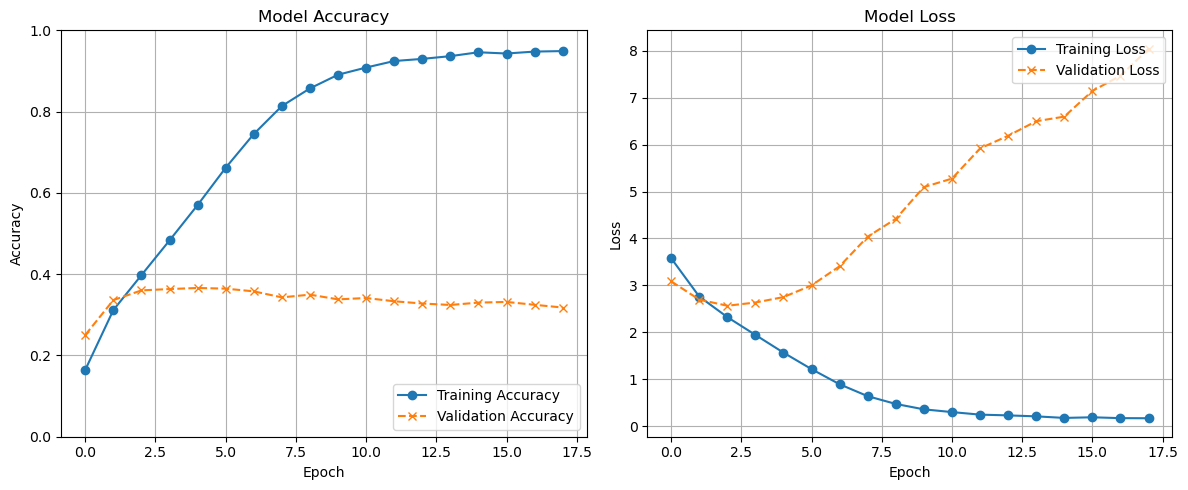

313/313 [==============================] - 5s 16ms/step


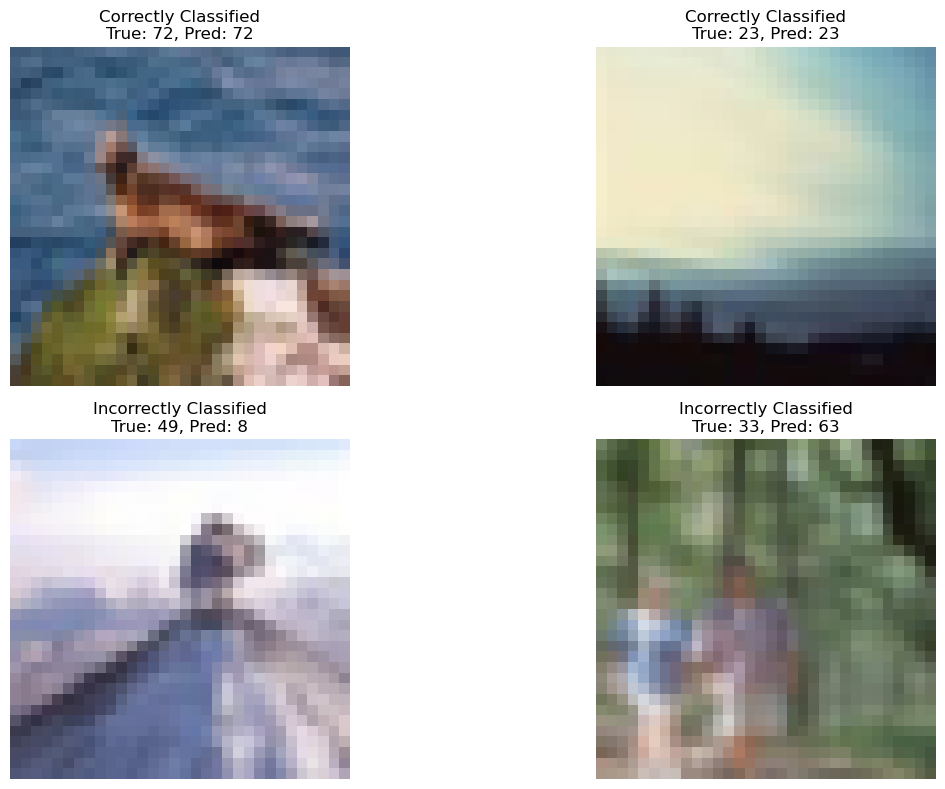

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# Predict labels for the test set
predictions = model.predict(X_test_normalized)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_one_hot, axis=1)

# Identify correctly and incorrectly classified indices
correct_indices = [i for i, (pred, true) in enumerate(zip(predicted_labels, true_labels)) if pred == true]
incorrect_indices = [i for i, (pred, true) in enumerate(zip(predicted_labels, true_labels)) if pred != true]

# Select two correct and two incorrect examples
correct_indices = correct_indices[:2]  # Select the first two correctly classified images
incorrect_indices = incorrect_indices[:2]  # Select the first two incorrectly classified images

# Plot examples if they exist
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot correctly classified images
for i, correct_index in enumerate(correct_indices):
    axes[0, i].imshow(X_test[correct_index])
    axes[0, i].set_title(f"Correctly Classified\nTrue: {true_labels[correct_index]}, Pred: {predicted_labels[correct_index]}")
    axes[0, i].axis('off')

# Plot incorrectly classified images
for i, incorrect_index in enumerate(incorrect_indices):
    axes[1, i].imshow(X_test[incorrect_index])
    axes[1, i].set_title(f"Incorrectly Classified\nTrue: {true_labels[incorrect_index]}, Pred: {predicted_labels[incorrect_index]}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model using a list of layers
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(100, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall

# Define optimizer, loss, and metrics
optimizer = Adam()
loss = CategoricalCrossentropy()
metrics = ['accuracy', Precision(), Recall()]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Training parameters
batch_size = 32
epochs = 15

# Train the model
history = model.fit(
    x=X_train_split,
    y=y_train_split,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val_split, y_val_split),
    shuffle=True
)


Epoch 1/15
1250/1250 [==============================] - 112s 89ms/step - loss: 3.8665 - accuracy: 0.1126 - precision_1: 0.5224 - recall_1: 0.0122 - val_loss: 3.2803 - val_accuracy: 0.2099 - val_precision_1: 0.6612 - val_recall_1: 0.0322
Epoch 2/15
1250/1250 [==============================] - 30724s 25s/step - loss: 3.1928 - accuracy: 0.2254 - precision_1: 0.6116 - recall_1: 0.0575 - val_loss: 2.9354 - val_accuracy: 0.2814 - val_precision_1: 0.6957 - val_recall_1: 0.0718
Epoch 3/15
1250/1250 [==============================] - 149s 119ms/step - loss: 2.8811 - accuracy: 0.2852 - precision_1: 0.6734 - recall_1: 0.1003 - val_loss: 2.7595 - val_accuracy: 0.3152 - val_precision_1: 0.7232 - val_recall_1: 0.1100
Epoch 4/15
1250/1250 [==============================] - 153s 122ms/step - loss: 2.6624 - accuracy: 0.3278 - precision_1: 0.6877 - recall_1: 0.1362 - val_loss: 2.6387 - val_accuracy: 0.3395 - val_precision_1: 0.7193 - val_recall_1: 0.1463
Epoch 5/15
1250/1250 [===========================

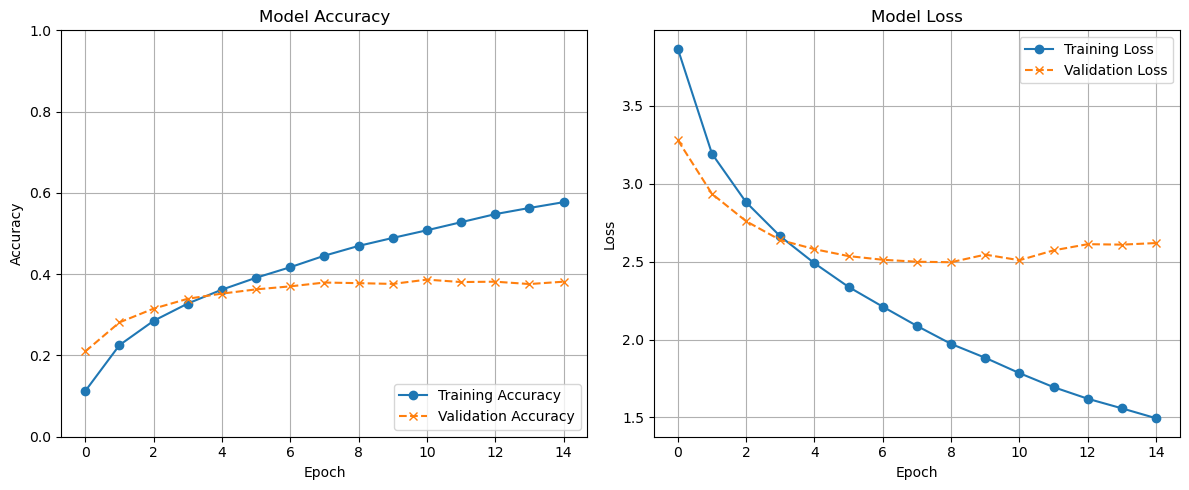

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 [==============================] - 9s 30ms/step


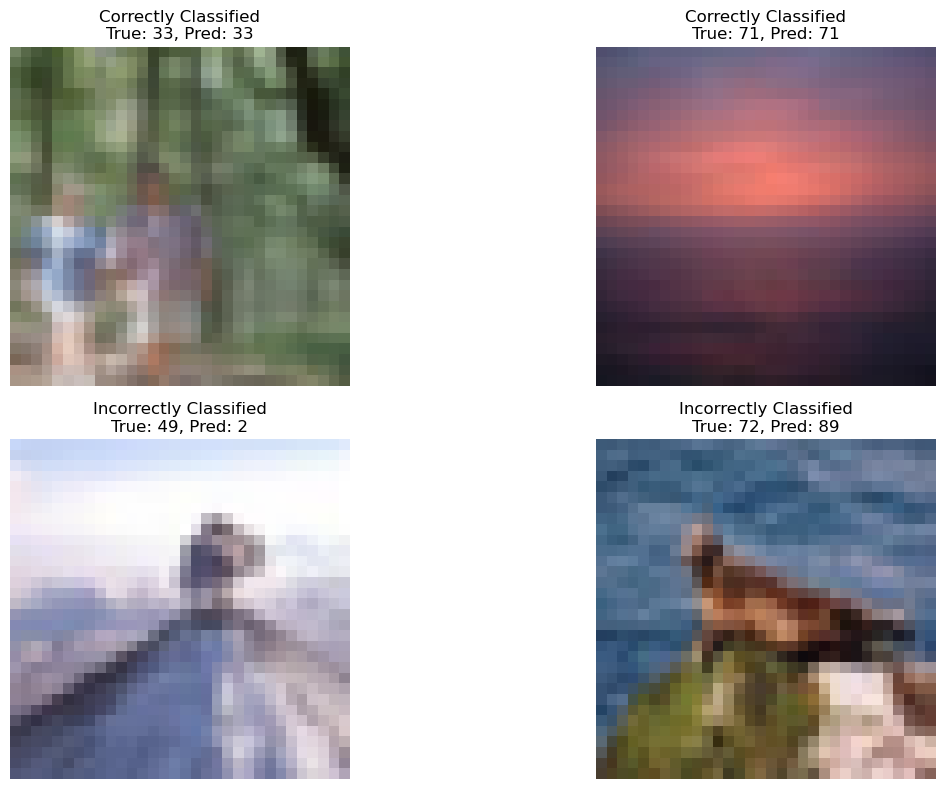

In [12]:


# Predict labels for the test set
predictions = model.predict(X_test_normalized)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_one_hot, axis=1)

# Identify correctly and incorrectly classified indices
correct_indices = [i for i, (pred, true) in enumerate(zip(predicted_labels, true_labels)) if pred == true]
incorrect_indices = [i for i, (pred, true) in enumerate(zip(predicted_labels, true_labels)) if pred != true]

# Select two correct and two incorrect examples
correct_indices = correct_indices[:2]  # Select the first two correctly classified images
incorrect_indices = incorrect_indices[:2]  # Select the first two incorrectly classified images

# Plot examples if they exist
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot correctly classified images
for i, correct_index in enumerate(correct_indices):
    axes[0, i].imshow(X_test[correct_index])
    axes[0, i].set_title(f"Correctly Classified\nTrue: {true_labels[correct_index]}, Pred: {predicted_labels[correct_index]}")
    axes[0, i].axis('off')

# Plot incorrectly classified images
for i, incorrect_index in enumerate(incorrect_indices):
    axes[1, i].imshow(X_test[incorrect_index])
    axes[1, i].set_title(f"Incorrectly Classified\nTrue: {true_labels[incorrect_index]}, Pred: {predicted_labels[incorrect_index]}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

After 15 epochs, I observed that the model's training accuracy reached about 57.46%, but the validation accuracy was only 38.22%, indicating some overfitting. While the model learned well from the training data, it didn't generalize as effectively to unseen data. I think this gap suggests that the model is too complex relative to the data size, despite using dropout for regularization. To improve, I plan to try data augmentation to boost generalization and tune hyperparameters like learning rates or dropout rates. I'm also considering transfer learning with a pre-trained model to leverage existing features. Exploring different architectures and ensemble methods could further enhance the model's robustness and performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.